In [27]:
%reset -fs
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [28]:
bet_df = pd.read_csv('betting_data.csv', index_col=0)

In [29]:
stat_df = pd.read_csv('stathead_data.csv')

In [30]:
# This is a comprehensive datset of player performance by game since the beginning of the season. Taken from Stathead.com.
stat_df.head(20)

Rk                            Player     Age  Pos   Tm Unnamed: 5  Opp  \
0    1       LaMarcus Aldridge\aldrila01  36-092  F-C  BRK          @  MIL   
1    2           Grayson Allen\allengr01  26-011    G  MIL        NaN  BRK   
2    3   Giannis Antetokounmpo\antetgi01  26-317  F-G  MIL        NaN  BRK   
3    4  Thanasis Antetokounmpo\antetth01  29-093    F  MIL        NaN  BRK   
4    5         Carmelo Anthony\anthoca01  37-143    F  LAL        NaN  GSW   
5    6           Kent Bazemore\bazemke01  32-110  G-F  LAL        NaN  GSW   
6    7         DeAndre' Bembry\bembrde01  27-107    F  BRK          @  MIL   
7    8         Nemanja Bjelica\bjeline01  33-163    F  GSW          @  LAL   
8    9           Avery Bradley\bradlav01  30-327    G  LAL        NaN  GSW   
9   10             Bruce Brown\brownbr01  25-065    G  BRK          @  MIL   
10  11            Jevon Carter\carteje01  26-035    G  BRK          @  MIL   
11  12             Nic Claxton\claxtni01  22-185    F  BRK          @  MIL   
12  13         Pat Connaughton\connapa01  28-286    G  MIL        NaN  BRK   
13  14           Stephen Curry\curryst01  33-219    G  GSW          @  LAL   
14  15           Anthony Davis\davisan02  28-222  F-C  LAL        NaN  GSW   
15  16            Kevin Durant\duranke01  33-020  F-G  BRK          @  MIL   
16  17          Draymond Green\greendr01  31-229    F  GSW          @  LAL   
17  18           Blake Griffin\griffbl01  32-217    F  BRK          @  MIL   
18  19            James Harden\hardeja01  32-054    G  BRK          @  MIL   
19  20              Joe Harris\harrijo01  30-043    G  BRK          @  MIL   

   Unnamed: 7        Date  GS  MP  FG  FGA    FG%  2P  2PA    2P%  3P  3PA  \
0           L  2021-10-19   0  16   0    2  0.000   0    2  0.000   0    0   
1           W  2021-10-19   1  28   3   10  0.300   0    0    NaN   3   10   
2           W  2021-10-19   1  31  12   25  0.480  11   21  0.524   1    4   
3           W  2021-10-19   0  12   2    3  0.667   2    3  0.667   0    0   
4           L  2021-10-19   0  26   3    9  0.333   1    5  0.200   2    4   
5           L  2021-10-19   1  31   3    9  0.333   1    1  1.000   2    8   
6           L  2021-10-19   0   4   0    0    NaN   0    0    NaN   0    0   
7           W  2021-10-19   0  26   6    7  0.857   5    6  0.833   1    1   
8           L  2021-10-19   0   8   2    3  0.667   0    0    NaN   2    3   
9           L  2021-10-19   0   4   0    0    NaN   0    0    NaN   0    0   
10          L  2021-10-19   0  19   0    3  0.000   0    1  0.000   0    2   
11          L  2021-10-19   1  24   6    9  0.667   6    9  0.667   0    0   
12          W  2021-10-19   0  30   8   13  0.615   4    4  1.000   4    9   
13          W  2021-10-19   1  36   5   21  0.238   3   13  0.231   2    8   
14          L  2021-10-19   1  39  15   26  0.577  14   21  0.667   1    5   
15          L  2021-10-19   1  30  13   25  0.520  10   18  0.556   3    7   
16          W  2021-10-19   1  30   2    5  0.400   2    5  0.400   0    0   
17          L  2021-10-19   1  23   2    5  0.400   2    4  0.500   0    1   
18          L  2021-10-19   1  31   6   16  0.375   2    8  0.250   4    8   
19          L  2021-10-19   1  31   3    9  0.333   0    4  0.000   3    5   

      3P%  FT  FTA    FT%    TS%  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  \
0     NaN   1    4  0.250  0.133    0    3    3    1    0    1    1   2    1   
1   0.300   1    1  1.000  0.479    0    4    4    6    2    0    0   0   10   
2   0.250   7    9  0.778  0.552    5    9   14    7    1    2    4   4   32   
3     NaN   2    2  1.000  0.773    1    3    4    1    0    1    0   1    6   
4   0.500   1    2  0.500  0.455    0    4    4    2    0    0    1   2    9   
5   0.250   0    0    NaN  0.444    0    2    2    0    0    1    1   4    8   
6     NaN   0    0    NaN    NaN    0    0    0    0    0    0    0   0    0   
7   1.000   2    2  1.000  0.952    2    9   11    4    1    0    1   2   15   
8   0.

In [31]:
# This is a comprehensive dataset on the individual wagers, and consensus lines offered for each on points prop bets to-date for the season. Taken from bettingpros.com
bet_df.head(20)

Unnamed: 0        Date          Name Team Position  Opp Home/Away  Line  \
0            0  2021-10-21        Bogdan  ATL        G  DAL       vs.  15.5   
1            1  2021-10-23        Bogdan  ATL        G  CLE         @  14.5   
2            2  2021-10-25        Bogdan  ATL        G  DET       vs.  15.5   
3            3  2021-10-28        Bogdan  ATL        G  WAS         @  12.5   
4            4  2021-10-30        Bogdan  ATL        G  PHI         @  12.5   
5            5  2021-11-01        Bogdan  ATL        G  WAS       vs.  12.5   
6            6  2021-11-03        Bogdan  ATL        G  BKN         @  13.5   
7            7  2021-11-04        Bogdan  ATL        G  UTH       vs.  12.5   
8            8  2021-11-06        Bogdan  ATL        G  PHO         @  12.5   
9            9  2021-11-08        Bogdan  ATL        G  GSW         @  12.5   
10          10  2021-11-14        Bogdan  ATL        G  MIL       vs.  13.5   
11          11  2021-11-20        Bogdan  ATL        G  CHA       vs.  12.5   
12          12  2021-11-26        Bogdan  ATL        G  MEM         @  12.5   
13          13  2021-11-27        Bogdan  ATL        G  NYK       vs.  11.5   
14          14  2021-12-22        Bogdan  ATL        G  ORL       vs.  15.5   
15          15  2021-12-25        Bogdan  ATL        G  NYK         @  15.5   
16          16  2022-01-07        Bogdan  ATL        G  LAL         @  11.5   
17          17  2022-01-12        Bogdan  ATL        G  MIA       vs.  14.5   
18          18  2021-10-20  Aaron Gordon  DEN        F  PHO         @  10.5   
19          19  2021-10-22  Aaron Gordon  DEN        F  SAS       vs.  11.5   

    Moneyline  Projection  Diff  Pick  Result pick_over_under  \
0        -115       16.57  1.07  16.0      11               o   
1        -115       15.29  0.79  14.5       5               o   
2        -115       12.85 -2.65  13.5      14               u   
3        -105       16.72  4.22  12.5      14               o   
4        -113       15.71  3.21  12.5      13               o   
5        -115       17.02  4.52  12.5      16               o   
6        -107       16.81  3.31  13.5       8               o   
7        -115       15.37  2.87  12.5       8               o   
8        -110       15.88  3.38  12.5      18               o   
9        -113       15.57  3.07  12.5      17               o   
10       -105       14.60  1.10  13.5       6               o   
11       -122       16.82  4.32  12.5       7               o   
12       -110       17.15  4.65  12.5       8               o   
13       -125       14.06  2.56  11.5       2               o   
14        105       14.46 -1.04  15.5       6               u   
15       -113       13.58 -1.92  15.5       8               u   
16       -115       13.50  2.00  11.5      15               o   
17       -120       12.10 -2.40  14.5      15               u   
18       -113       13.29  2.79  10.5      12               o   
19       -103       13.78  2.28  11.5       8               o   

    seven_day_accuracy  successful_pick  
0                 0.47                0  
1                 0.45                0  
2                 0.45                0  
3                 0.42                1  
4                 0.45                1  
5                 0.52                1  
6                 0.55                0  
7                 0.53                0  
8                 0.48                1  
9                 0.44                1  
10                0.47                0  
11                0.56                0  
12                0.40                0  
13                0.42                0  
14                0.60                1  
15                0.60                1  
16                0.61                1  
17                0.55                0  
18                0.33                1  
19                0.47                0

In [3]:
len(df)

4626

In [4]:
#Drop these columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Save yourself the trouble of remembering later
df= df.replace('vs.', 'Home')
df= df.replace('@', 'Away')

In [6]:
# As above
df['pick_over_under'] = df['pick_over_under'].replace('o','Over')
df['pick_over_under'] = df['pick_over_under'].replace('u','Under')

In [7]:
# As above
df['successful_pick'] = df['successful_pick'].replace('0','Miss')
df['successful_pick'] = df['successful_pick'].replace('1','Hit')

In [8]:
# Create OHE DF
ohe_df = pd.get_dummies(df, {'Position': 'is', 'Team': 'team_is', 'Opp':'opp_is', 'Home/Away':'is', 'pick_over_under':'is', 'successful_pick':'is'}, columns=['Team', 'Position', 'Opp', 'Home/Away', 'pick_over_under', 'successful_pick'])

<AxesSubplot:>

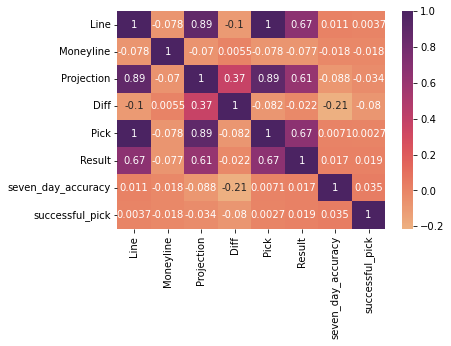

In [9]:
sns.heatmap(data=df.corr(), cmap='flare', annot=True)

In [ ]:
#Pick & Line are perfectly correlated-- dump one in final version (Pick your days are numbered).

In [10]:
lr = LinearRegression()

In [11]:
#Define Targets - I think I'm supposed to reshape this.
y = ohe_df.Result

In [12]:
y

0       11
1        5
2       14
3       14
4       13
        ..
4621    21
4622     3
4623     4
4624     2
4625     2
Name: Result, Length: 4626, dtype: int64

In [13]:
# Define Features
X = ohe_df.drop(['Result', 'Date', 'Name', 'Pick'], axis=1)

In [14]:
X

Line  Moneyline  Projection  Diff  seven_day_accuracy  team_is_ATL  \
0     15.5       -115       16.57  1.07                0.47            1   
1     14.5       -115       15.29  0.79                0.45            1   
2     15.5       -115       12.85 -2.65                0.45            1   
3     12.5       -105       16.72  4.22                0.42            1   
4     12.5       -113       15.71  3.21                0.45            1   
...    ...        ...         ...   ...                 ...          ...   
4621   5.5       -105        2.91 -2.59                0.55            0   
4622   7.5        115        3.35 -4.15                0.51            0   
4623   5.5       -130        4.33 -1.17                0.42            0   
4624   8.5       -105        6.11 -2.39                0.58            0   
4625  10.5       -125        8.60 -1.90                0.55            0   

      team_is_BKN  team_is_BOS  team_is_CHA  team_is_CHI  team_is_CLE  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
4621            0            0            0            0            0   
4622            0            0            0            0            0   
4623            0            0            0            0            0   
4624            0            0            0            0            0   
4625            0            0            0            0            0   

      team_is_DAL  team_is_DEN  team_is_DET  team_is_GSW  team_is_HOU  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
4621            0            1            0            0            0   
4622            0            1            0            0            0   
4623            0            0            0            0            0   
4624            0            0            0            0            0   
4625            0            0            0            0            0   

      team_is_IND  team_is_LAC  team_is_LAL  team_is_MEM  team_is_MIA  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
4621            0            0            0            0            0   
4622            0            0            0            0            0   
4623            0            0            0            1            0   
4624            0            0            0            1            0   
4625            0            0            0            1            0   

      team_is_MIL  team_is_MIN  team_is_NOR  team_is_NYK  team_is_OKC  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...       

In [15]:
lr.fit(X,y)

LinearRegression()

In [16]:
preds = lr.predict(X)

In [17]:
# R2 Score - Unsurprisingly the betting info has some baseline predictive power. Basically right now I am modelling a model.
lr.score(X,y)

0.45494411631035203

In [18]:
 lr.intercept_

10752518025.874113

In [19]:
# Coef is predictive power of a given feature? Multicollinearity present too. Lending to misattribution of predictvie power.
lr.coef_

array([ 3.52484492e+01, -3.27691701e-03, -3.42820349e+01,  3.44140495e+01,
        2.66081383e+00,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  4.61752293e+10,
        4.61752293e+10,  4.61752293e+10,  4.61752293e+10,  1.26591735e+11,
        1.26591735e+11,  1.26591735e+11,  1.26591735e+11,  1.26591735e+11,
       -4.29521780e+09, -4.29521780e+09, -4.29521780e+09, -4.29521780e+09,
       -4.29521780e+09, -4.29521780e+09, -4.29521780e+09, -4.29521780e+09,
       -4.29521780e+09, -4.29521780e+09, -4.29521780e+09, -4.29521780e+09,
       -4.29521780e+09, -

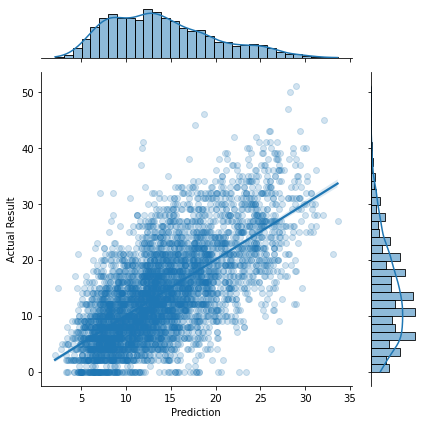

In [20]:
ax = sns.jointplot(x=preds, y=y, kind='reg', joint_kws = {'scatter_kws':dict(alpha=0.2)})
ax.set_axis_labels(xlabel='Prediction', ylabel='Actual Result')
plt.tight_layout()
plt.show()

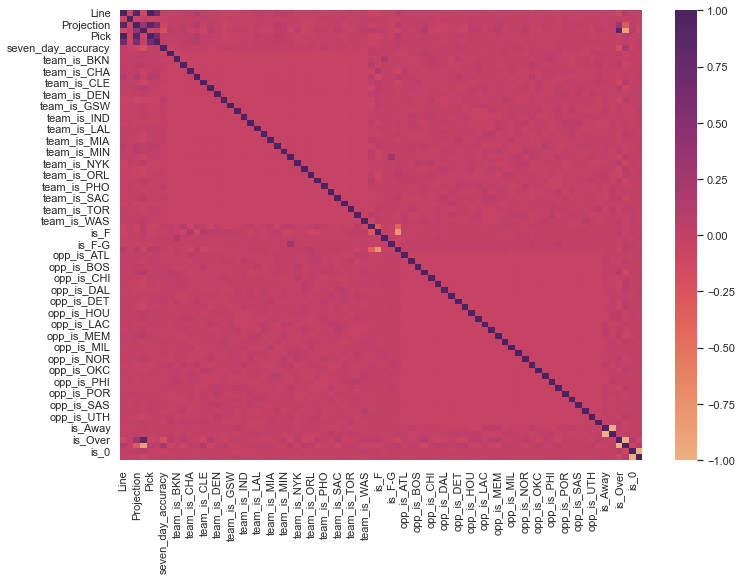

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(data=ohe_df.corr(), cmap='flare')